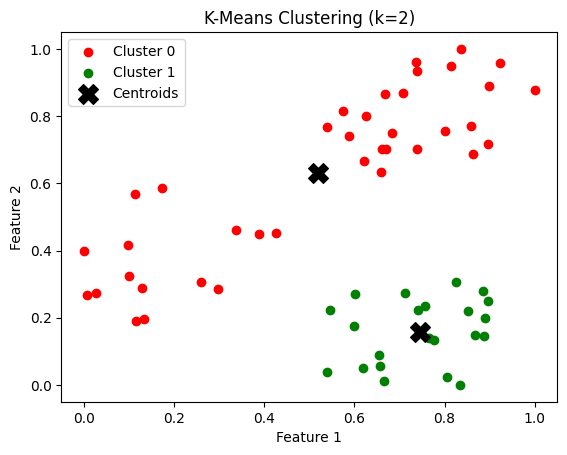

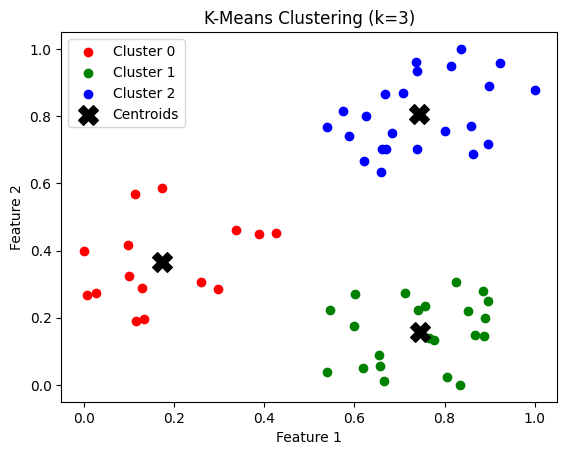

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("kmeans.csv")
X = data.iloc[:, :2].values  # Selecting the first two columns for clustering

# Normalize the data
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Function to initialize centroids randomly
def initialize_centroids(X, k):
    np.random.seed(42)  # For reproducibility
    return X[np.random.choice(X.shape[0], k, replace=False)]

# Function to assign clusters based on nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to update centroids
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# K-Means algorithm
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

# Plotting function
def plot_clusters(X, labels, centroids, k):
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(f'K-Means Clustering (k={k})')
    plt.show()

# Run K-Means for k=2
labels_2, centroids_2 = kmeans(X, k=2)
plot_clusters(X, labels_2, centroids_2, k=2)

# Run K-Means for k=3
labels_3, centroids_3 = kmeans(X, k=3)
plot_clusters(X, labels_3, centroids_3, k=3)
